In [1]:
####################################################################################
#                CHURN AND HAPPINESS - ANNABELLE CHUINARD - DEEPND                 # 
#                               PART 1: DATA PREP                                  #
####################################################################################

In [2]:
import numpy as np 
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
samplePath = '/home/anabel/DeepND/Happiness/'

In [4]:
# Assigning feature name to each column of the samples and binarizing true/false features


column_header_churn = ["employeeID", "companyID", "numProbe", "lastDate", "churn"]

df_churn = pd.read_csv( 
    samplePath + 'churn.csv',
    sep = ',', 
    header = 0, 
    names = column_header_churn,
    engine = 'python') 

column_header_probe = ["employeeID", "companyID", "probeDate", "probeValue"]

df_probe = pd.read_csv( 
    samplePath + 'votes.csv',
    sep = ',', 
    header = 0, 
    names = column_header_probe,
    engine = 'python') 

column_header_comReact = ["employeeID", "companyID", "commentLiked", "commentDisliked", "commentID"]

df_comReact = pd.read_csv(
    samplePath + 'commentInteractions.csv',
    sep = ',',
    header = 0, 
    names = column_header_comReact,
    engine = 'python') 

column_header_comPub = ["employeeID", "companyID", "commentID", "commentLength", "numLikes","numDislikes", "commentDate" ]

df_comPub = pd.read_csv(
    samplePath + 'comments_clean_anonimized.csv',
    sep = ',',
    header = 0, 
    names = column_header_comPub,
    engine = 'python') 

# Mapping churn feature to binary values
mapping = {'true':1, 'false':0, 'True':1, 'False':0}
#df_churn['churn'] = df_churn['churn'].map(mapping)
df_comReact['commentLiked'] = df_comReact['commentLiked'].map(mapping)
df_comReact['commentDisliked'] = df_comReact['commentDisliked'].map(mapping)

In [5]:
df_comReact.head()

employeeID                 companyID  commentLiked  commentDisliked  \
0         307  56aec740f1ef260003e307d6           1.0              0.0   
1          36  56aec740f1ef260003e307d6           1.0              0.0   
2         276  56aec740f1ef260003e307d6           1.0              0.0   
3          24  56aec740f1ef260003e307d6           1.0              0.0   
4         382  56aec740f1ef260003e307d6           1.0              0.0   

                  commentID  
0  58d018d7e010990004e38070  
1  58d018d7e010990004e38070  
2  58d018d7e010990004e38070  
3  58d018d7e010990004e38070  
4  58d0179ae010990004e3806d

df_comReact.head()

In [6]:
compSeries = pd.Series(df_probe['companyID'].unique())  #takes only one ID per company
listOfCompanies = compSeries.tolist()
assoc1 = [listOfCompanies.index(thisComp)+1 for thisComp in df_probe['companyID'].values]
assoc2 = [listOfCompanies.index(thisComp)+1 if thisComp in compSeries.values else -1 for thisComp in df_churn['companyID'].values]
assoc3 = [listOfCompanies.index(thisComp)+1 if thisComp in compSeries.values else -1 for thisComp in df_comReact['companyID'].values]
assoc4 = [listOfCompanies.index(thisComp)+1 if thisComp in compSeries.values else -1 for thisComp in df_comPub['companyID'].values]

df_probe['companyID'] = assoc1
df_churn['companyID'] = assoc2
df_comReact['companyID'] = assoc3
df_comPub['companyID'] = assoc4

commentSeries = pd.Series(df_comPub['commentID'].unique())  #takes only one ID per comment
listOfComments = commentSeries.tolist()
assoc1 = [listOfComments.index(thisComm)+1 for thisComm in df_comPub['commentID'].values]
assoc2 = [listOfComments.index(thisComm)+1 if thisComm in commentSeries.values else -1 for thisComm in df_comReact['commentID'].values]

df_comPub['commentID'] = assoc1
df_comReact['commentID'] = assoc2


In [7]:
df_churn.head()

employeeID  companyID  numProbe                      lastDate  churn
0         512          1         4  Thu Feb 23 12:48:04 CET 2017   True
1          -2          1         0  Wed Jan 18 14:00:55 CET 2017  False
2           2          1        72  Fri Mar 17 01:00:00 CET 2017   True
3         487          1        14  Sat Nov 19 15:02:14 CET 2016  False
4           3          1        22  Thu Feb 16 01:00:00 CET 2017   True

In [8]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
employeeID    4847 non-null int64
companyID     4847 non-null int64
numProbe      4847 non-null int64
lastDate      4847 non-null object
churn         4847 non-null bool
dtypes: bool(1), int64(3), object(1)
memory usage: 156.3+ KB


In [9]:
# Changing the format of times and isolating certain timescales

datesProbe = df_probe['probeDate'].str.replace('CET','') #cleaning up timezones 
datesProbe = datesProbe.str.replace('CEST','')
df_probe['probeDate'] = datesProbe
df_probe['probeDate'] = pd.to_datetime(df_probe['probeDate'],format="%a %b %d %H:%M:%S %Y") #formating
df_probe['probeDayOfWeek'] = df_probe['probeDate'].dt.dayofweek  
df_probe['probeDayOfYear'] = df_probe['probeDate'].dt.dayofyear
df_probe['probeYear'] = df_probe['probeDate'].dt.year

datesChurn = df_churn['lastDate'].str.replace('CET','') #cleaning up timezones 
datesChurn = datesChurn.str.replace('CEST','')
df_churn['lastDate'] = datesChurn
df_churn['lastDate'] = pd.to_datetime(df_churn['lastDate'],format="%a %b %d %H:%M:%S %Y") #formating
df_churn['lastDateMonth'] = df_churn['lastDate'].dt.month  


In [1]:
 df_probe.info()

NameError: name 'df_probe' is not defined

In [11]:
df_probe['employeeID'] = df_probe['companyID'].astype(str) + "_" + df_probe['employeeID'].astype(str)
df_churn['employeeID'] = df_churn['companyID'].astype(str) + "_" + df_churn['employeeID'].astype(str)
df_comReact['employeeID'] = df_comReact['companyID'].astype(str) + "_" + df_comReact['employeeID'].astype(str)
df_comPub['employeeID'] = df_comPub['companyID'].astype(str) + "_" + df_comPub['employeeID'].astype(str)

In [14]:
df_comReact

employeeID  companyID  commentLiked  commentDisliked  commentID
0           1_307          1           1.0              0.0          1
1            1_36          1           1.0              0.0          1
2           1_276          1           1.0              0.0          1
3            1_24          1           1.0              0.0          1
4           1_382          1           1.0              0.0          2
5            1_24          1           0.0              1.0          2
6           1_217          1           0.0              1.0          2
7           1_164          1           1.0              0.0          3
8            1_34          1           1.0              0.0          3
9           1_152          1           1.0              0.0          3
10          1_152          1           1.0              0.0          4
11           1_34          1           0.0              1.0          4
12          1_225          1           1.0              0.0          5
13          1_124          1           1.0              0.0          5
14          1_382          1           1.0              0.0          5
15          1_169          1           0.0              1.0          5
16          1_152          1           0.0              1.0          5
17          1_291          1           1.0              0.0          6
18          1_509          1           1.0              0.0          7
19           1_13          1           1.0              0.0          7
20          1_538          1           1.0              0.0          7
21           1_18          1           1.0              0.0          7
22          1_226          1           1.0              0.0          7
23          1_225          1           1.0              0.0          7
24           1_34          1           1.0              0.0          7
25          1_516          1           1.0              0.0          7
26          1_310          1           1.0              0.0          7
27          1_170          1           1.0              0.0          7
28          1_164          1           1.0              0.0          7
29          1_135          1           1.0              0.0          7
...           ...        ...           ...              ...        ...
336930     36_233         36           1.0              0.0      41365
336931      36_38         36           1.0              0.0      41365
336932     36_478         36           1.0              0.0      41365
336933     36_218         36           1.0              0.0      41365
336934     36_-13         36           1.0              0.0      41366
336935     36_146         36           1.0              0.0      41366
336936     36_246         36           1.0              0.0      41366
336937     36_262         36           1.0              0.0      41366
336938     36_259         36           1.0              0.0      41366
336939     36_219         36           1.0              0.0      41366
336940     36_-13         36           1.0              0.0      41367
336941     36_121         36           1.0              0.0      41367
336942      36_68         36           1.0              0.0      41367
336943     36_219         36           0.0              1.0      41367
336944      36_74         36           1.0              0.0      41368
336945     36_268         36           1.0              0.0      41368
336946       36_4         36           1.0              0.0      41368
336947     36_266         36           1.0              0.0      41368
336948     36_360         36           1.0              0.0      41368
336949     36_358         36           1.0              0.0      41368
336950     36_-10         36           1.0              0.0      41368
336951     36_484         36           1.0              0.0      41368
336952     36_146         36           1.0              0.0      41368
336953     36_449         36           1.0              0.0      41368
336954      36_26         36   

In [15]:
df_probe.to_csv(samplePath +'probe_clean.csv', sep=',') 
df_churn.to_csv(samplePath +'churn_clean.csv', sep=',') 
df_comPub.to_csv(samplePath +'comPub_clean.csv', sep=',') 
df_comReact.to_csv(samplePath +'comReact_clean.csv', sep=',') 

In [ ]:
df_full = pd.merge(df_probe, df_comReact,df_comPub, df_chun on='employeeID')

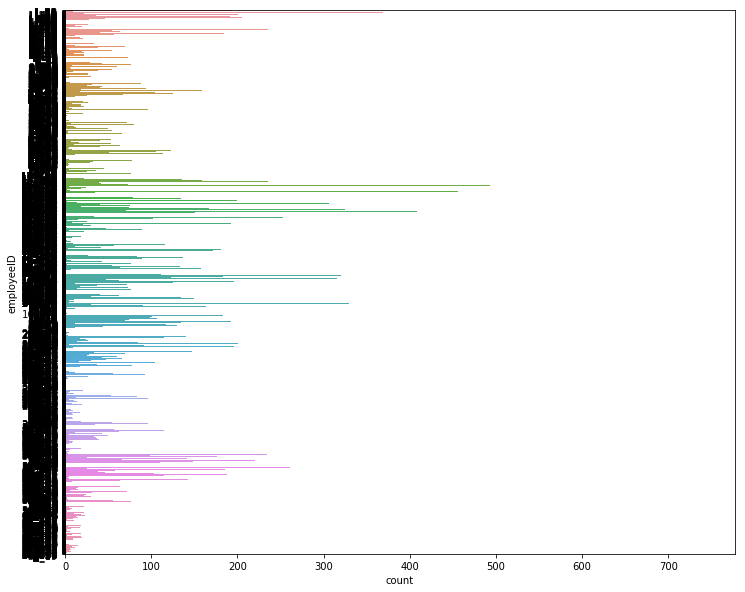

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

f,axarr = fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(12,10))
#data =df_probe.groupby('probeDayOfWeek').mean()
sns.countplot(data=df_probe,y= 'employeeID')